## 决策树分类小DEMO   

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

# 这里为了方便可视化数据的类别，所以这里只取鸢尾花数据集中的后两个维度的特征   
X = iris.data[:, 2:]
y = iris.target 

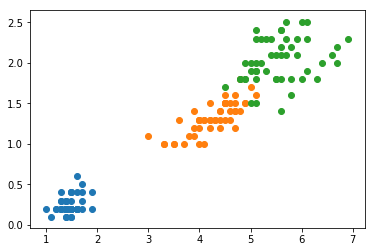

In [3]:
# 首先对数据点对分布进行可视化  

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

下面使用决策树模型对数据进行分类   

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 这里设定树的最大深度为2， 然后分类阈值计算的标准为熵
dt_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

/Users/barackbao/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


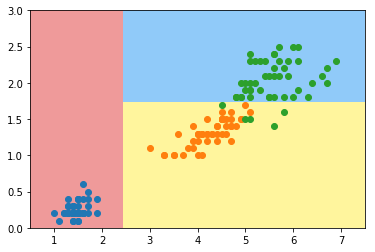

In [9]:
# 决策边界函数  
def plot_decision_boundary(model, axis):
    """
    axis指定了两个坐标轴的取值范围
    """
    # 构成一个二维表格
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    
    # np.ravel将多维数据降成一维，并且会返回一个引用（类似C++）
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap  
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
plot_decision_boundary(dt_clf, [0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

![dt](./img/dt.png)

决策树各结点的评判策略就是对应到各个数据维度上的一些阈值    

**构建决策树模型时，我们应该关注的是在每次结点分叉时应该选取哪些数据特征进行判断，当选取好一个特征后，我们应该如何确定判断时的阈值，比如可以通过计算熵值来确定**

## 信息熵   

熵在信息论中代表**随机变量不确定度的度量**    

一个系统的信息熵计算公式如下：   

$$H = -\sum_{i=1}^{k}p_ilog(p_i)$$   

其中k代表该系统中共有k种元素，熵的计算就是将k种元素的不确定度量进行求和   

## 可视化信息熵  

假设现在有一个系统中只有两类数据（两个元素），假设其中一种数据的比例为x，则另一类数据比例就是1-x，那该系统的信息熵就是：   

$$H = -xlog(x) - (1-x)log(1-x)$$

In [14]:
# 首先计算该系统的信息熵   
def entropy(p):
    # 这里使用np.log，既可以计算标量，也可以计算向量   
    return -p * np.log(p) - (1 - p) * np.log(1 - p)

In [15]:
# 设置p的范围从0到1，但是不能为0和1   
# 等间距取200个点  
x = np.linspace(0.01, 0.99, 200)

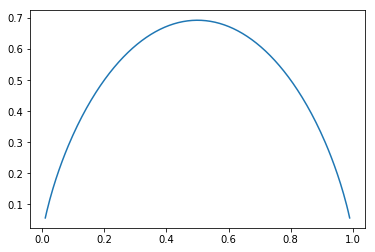

In [17]:
plt.plot(x, entropy(x))
plt.show()

从上图可以看到交叉熵的曲线呈一个抛物线状，其中的对称轴为p=0.5，当两类数据都比例都为0.5时，此时的熵值最高，此时模型的不确定度最高   

决策树模型训练时的目标就是让整个系统的不确定度最小，这时整个系统对各个数据类别的划分就最清晰   